In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np

In [2]:
from scipy import stats
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import linregress

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [4]:
dataset= pd.read_csv (r"C:\Users\shile\OneDrive\Desktop\BSC\Semester 4\DTA612S - Data Analytics\Projects\StudentPerformanceFactors.csv")

In [5]:
dataset

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [6]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6607.0,2.967610,1.031231,0.0,2.0,3.0,4.0,6.0
Exam_Score,6607.0,67.235659,3.890456,55.0,65.0,67.0,69.0,101.0


# Data Visualization
 Understanding Overall Performance:
<li>	How is the overall distribution of exam scores?


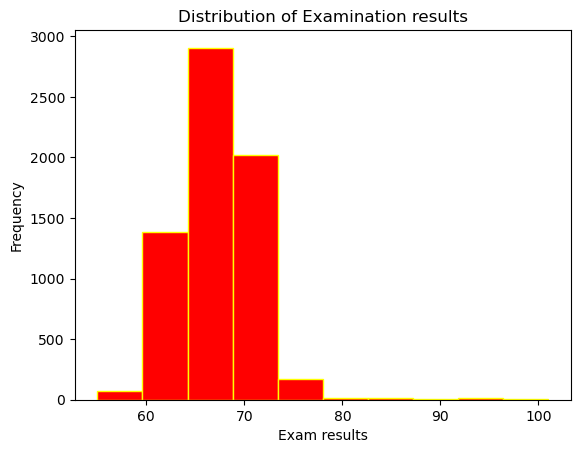

In [7]:
#plt.figure(figsize=(2,4))
plt.hist(dataset['Exam_Score'], bins = 10, color = 'red', edgecolor = 'yellow')
plt.title('Distribution of Examination results')
plt.xlabel('Exam results')
plt.ylabel('Frequency')
plt.show()

In [8]:

dataset['Grade_Class'] = pd.cut(dataset['Exam_Score'], 
                           bins=[0, 49, 59, 69, 74, 100], 
                           labels=['Fail', 'Pass', 'Credit', 'Merit', 'Distinction'])

grade_counts = dataset['Grade_Class'].value_counts().reset_index()
grade_counts.columns = ['Grade_Class', 'Count']


fig = px.pie(grade_counts, 
             names='Grade_Class', 
             values='Count', 
             title='Distribution of Exam Scores by Grade Class')

fig.show()

C:\Users\shile\AppData\Local\Temp\ipykernel_38868\1679439040.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




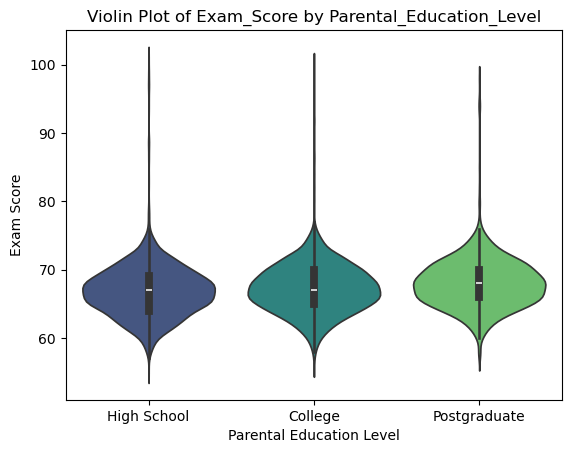

In [9]:
#plt.figure(figsize=(10, 6))
sns.violinplot(x='Parental_Education_Level', y='Exam_Score', data=dataset, palette='viridis')
plt.title('Violin Plot of Exam_Score by Parental_Education_Level')
plt.xlabel('Parental Education Level')
plt.ylabel('Exam Score')
plt.show()


In [10]:
# Study Habits and Academic Performance:
<li>	How does the number of hours studied per week correlate with exam scores?


Object `scores` not found.


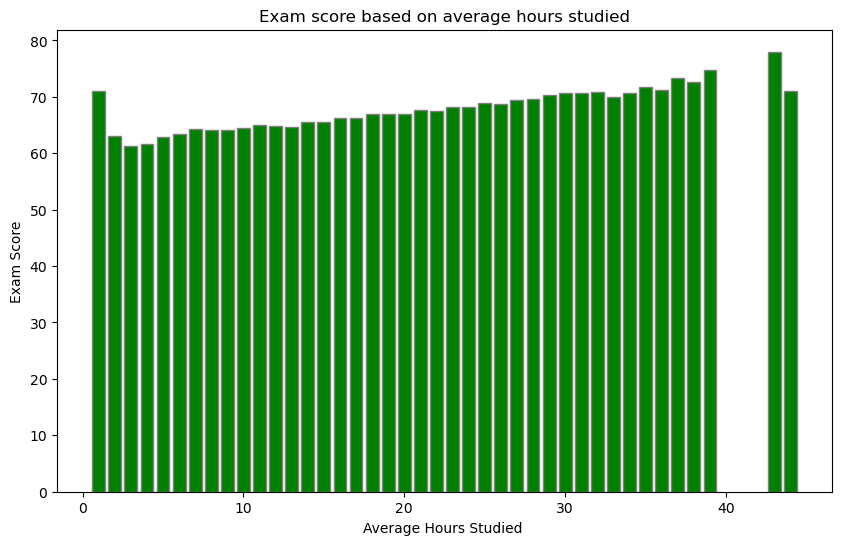

In [11]:
# Grouping data by 'Exam_Score' and calculating the mean 'Hours_Studied'
grouped_data = dataset.groupby('Hours_Studied')['Exam_Score'].mean()

# Creating a bar chart
plt.figure(figsize=(10, 6))  
plt.bar(grouped_data.index, grouped_data, color='green', edgecolor='gray')
plt.title('Exam score based on average hours studied')
plt.xlabel('Average Hours Studied ')
plt.ylabel('Exam Score')
plt.show()


In [12]:
grouped_data = dataset.groupby('Hours_Studied')['Exam_Score'].mean().reset_index()

fig = px.scatter(grouped_data, 
                 x='Hours_Studied', 
                 y='Exam_Score', 
                 title='Exam Score Based on Average Hours Studied',
                 labels={'Hours_Studied': 'Average Hours Studied', 'Exam_Score': 'Exam Score'},
                 template='plotly')

fig.show()

In [13]:
grouped_data = dataset.groupby('Attendance')['Exam_Score'].mean().reset_index()

# Creating an interactive bar chart using Plotly
fig = px.bar(grouped_data, 
             x='Attendance', 
             y='Exam_Score', 
             title='Exam Score Based on Attendance',
             labels={'Attendance': 'Attendance Percentage', 'Exam_Score': 'Average Exam Score'},
             template='plotly',
             color='Exam_Score')  # Optional: color by Exam_Score for visual effect

# Display the interactive bar chart
fig.show()

In [14]:
fig = px.scatter(dataset, 
                 x='Teacher_Quality',  # Teacher Quality is already categorical (Low, Medium, High)
                 y='Exam_Score', 
                 title='Exam Score Based on Teacher Quality (Low, Medium, High))',
                 labels={'Teacher_Quality': 'Teacher Quality', 'Exam_Score': 'Exam Score'},
                 template='plotly',
                 color='Teacher_Quality',  # Color points by Teacher Quality
                 hover_data=['Teacher_Quality', 'Exam_Score'])  # Show additional info on hover

# Display the interactive scatter plot
fig.show()

In [15]:
public_schools = dataset[dataset['School_Type'] == 'Public']
private_schools = dataset[dataset['School_Type'] == 'Private']

# Create interactive scatter plots
fig1 = px.scatter(public_schools, x='Hours_Studied', y='Exam_Score', title='Public Schools Scatter Plot')
fig2 = px.scatter(private_schools, x='Hours_Studied', y='Exam_Score', title='Private Schools Scatter Plot')

# Show the plots
fig1.show()
fig2.show()

In [16]:
near_schools = dataset[dataset['Distance_from_Home'] == 'Near']
far_schools = dataset[dataset['Distance_from_Home'] == 'Far']
moderate_schools = dataset[dataset['Distance_from_Home'] == 'Moderate']

fig1 = px.scatter(near_schools, x='Hours_Studied', y='Exam_Score', title='Near to School: Hours Studied vs. Exam Score')
fig2 = px.scatter(far_schools, x='Hours_Studied', y='Exam_Score', title='Far from School: Hours Studied vs. Exam Score')
fig3 = px.scatter(moderate_schools, x='Hours_Studied', y='Exam_Score', title='Moderate distance from School: Hours Studied vs. Exam Score')

fig1.show()
fig2.show()
fig3.show()

In [17]:
low_quality_teachers = dataset[dataset['Teacher_Quality'] == 'Low']
medium_quality_teachers = dataset[dataset['Teacher_Quality'] == 'Medium']
high_quality_teachers = dataset[dataset['Teacher_Quality'] == 'High']

fig1 = px.bar(low_quality_teachers, x='Tutoring_Sessions', y='Exam_Score', title='Low-Quality Teachers: Tutoring Sessions vs. Exam Score')
fig2 = px.bar(medium_quality_teachers, x='Tutoring_Sessions', y='Exam_Score', title='Medium-Quality Teachers: Tutoring Sessions vs. Exam Score')
fig3 = px.bar(high_quality_teachers, x='Tutoring_Sessions', y='Exam_Score', title='High-Quality Teachers: Tutoring Sessions vs. Exam Score')

fig1.update_layout(yaxis_range=[min(low_quality_teachers['Exam_Score']), max(low_quality_teachers['Exam_Score'])])
fig2.update_layout(yaxis_range=[min(medium_quality_teachers['Exam_Score']), max(medium_quality_teachers['Exam_Score'])])
fig3.update_layout(yaxis_range=[min(high_quality_teachers['Exam_Score']), max(high_quality_teachers['Exam_Score'])])


fig1.show()
fig2.show()
fig3.show()

In [18]:
def get_grade_class(score):
    if score >= 75:
        return 'Distinction'
    elif score >= 70:
        return 'Merit'
    elif score >= 60:
        return 'Credit'
    elif score >= 50:
        return 'Pass'
    else:
        return 'Fail'

# Apply the grading function to create a new column in the dataset
dataset['Grade_Class'] = dataset['Exam_Score'].apply(get_grade_class)

# Filter the DataFrame based on teacher quality
low_quality_teachers = dataset[dataset['Teacher_Quality'] == 'Low']
medium_quality_teachers = dataset[dataset['Teacher_Quality'] == 'Medium']
high_quality_teachers = dataset[dataset['Teacher_Quality'] == 'High']

# Group by 'Tutoring_Sessions' and 'Grade_Class' and calculate the average 'Exam_Score'
low_quality_grouped = low_quality_teachers.groupby(['Tutoring_Sessions', 'Grade_Class'], as_index=False)['Exam_Score'].mean()
medium_quality_grouped = medium_quality_teachers.groupby(['Tutoring_Sessions', 'Grade_Class'], as_index=False)['Exam_Score'].mean()
high_quality_grouped = high_quality_teachers.groupby(['Tutoring_Sessions', 'Grade_Class'], as_index=False)['Exam_Score'].mean()

fig1 = px.bar(low_quality_grouped, 
               x='Tutoring_Sessions', 
               y='Exam_Score', 
               color='Grade_Class', 
               title='Low-Quality Teachers: Average Exam Score by Tutoring Sessions and Grade Class',
               barmode='group')
fig2 = px.bar(medium_quality_grouped, 
               x='Tutoring_Sessions', 
               y='Exam_Score', 
               color='Grade_Class', 
               title='Medium-Quality Teachers: Average Exam Score by Tutoring Sessions and Grade Class',
               barmode='group')
fig3 = px.bar(high_quality_grouped, 
               x='Tutoring_Sessions', 
               y='Exam_Score', 
               color='Grade_Class', 
               title='High-Quality Teachers: Average Exam Score by Tutoring Sessions and Grade Class',
               barmode='group')

# Show the plots
fig1.show()
fig2.show()
fig3.show()

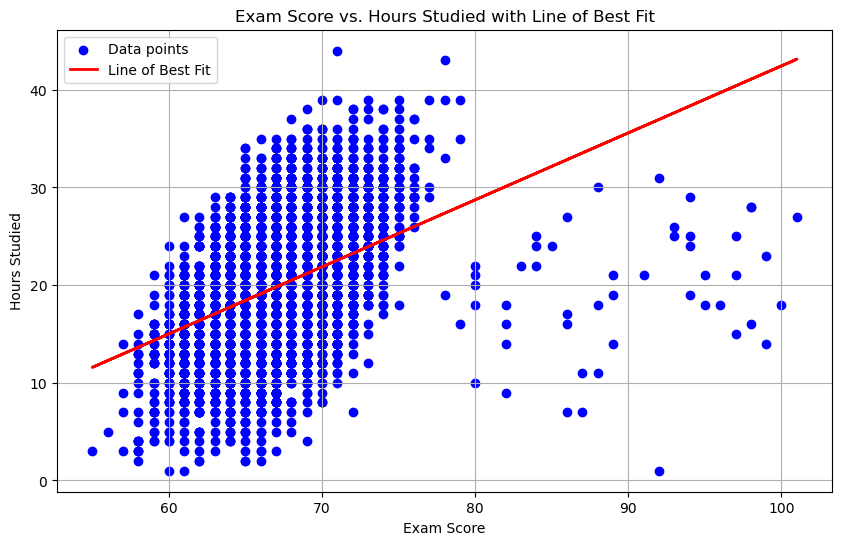

In [19]:


# Extract data for plotting
x = dataset['Exam_Score']
y = dataset['Hours_Studied']

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line_of_best_fit = slope * x + intercept

# Plot the data and the line of best fit
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, line_of_best_fit, color='red', linestyle='-', linewidth=2, label='Line of Best Fit')
plt.title('Exam Score vs. Hours Studied with Line of Best Fit')
plt.xlabel('Exam Score')
plt.ylabel('Hours Studied')
plt.legend()
plt.grid(True)
plt.show()



# Attendance and Its Impact:
<li>	What is the relationship between attendance percentage and exam scores?
<li>	Do students with higher attendance consistently score better in exams?


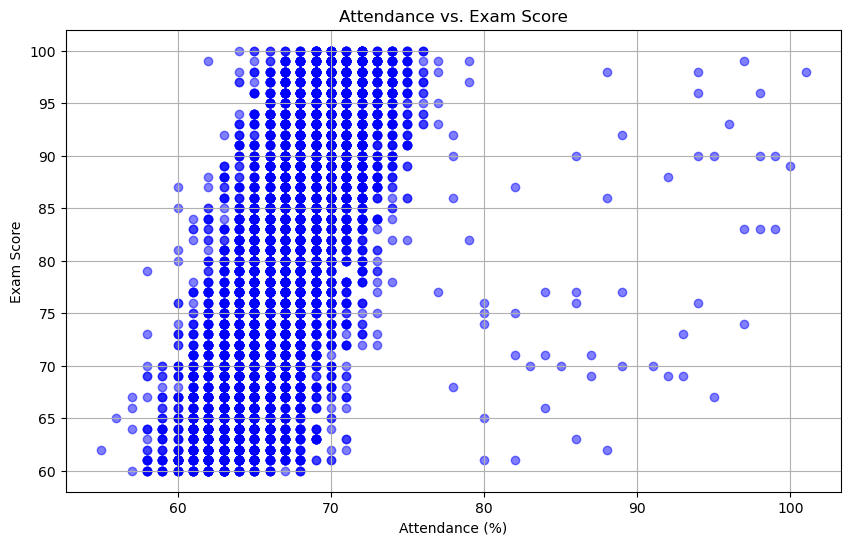

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset['Exam_Score'], dataset['Attendance'], color='blue', alpha=0.5)
plt.title('Attendance vs. Exam Score')
plt.xlabel('Attendance (%)')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

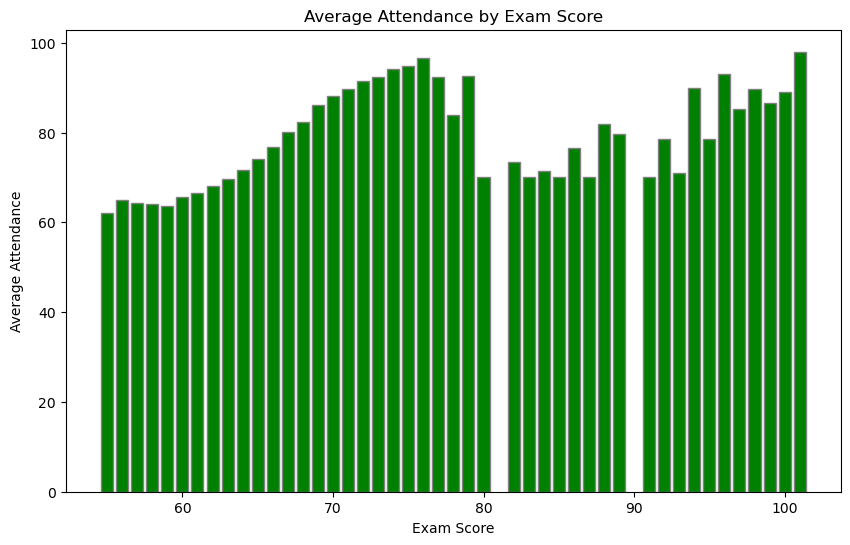

In [21]:
# Grouping data by 'Exam_Score' and calculating the mean 'Attendance'
grouped_data = dataset.groupby('Exam_Score')['Attendance'].mean()

# Creating a bar chart
plt.figure(figsize=(10, 6))  
plt.bar(grouped_data.index, grouped_data, color='green', edgecolor='gray')
plt.title('Average Attendance by Exam Score')
plt.xlabel('Exam Score')
plt.ylabel('Average Attendance')
plt.show()

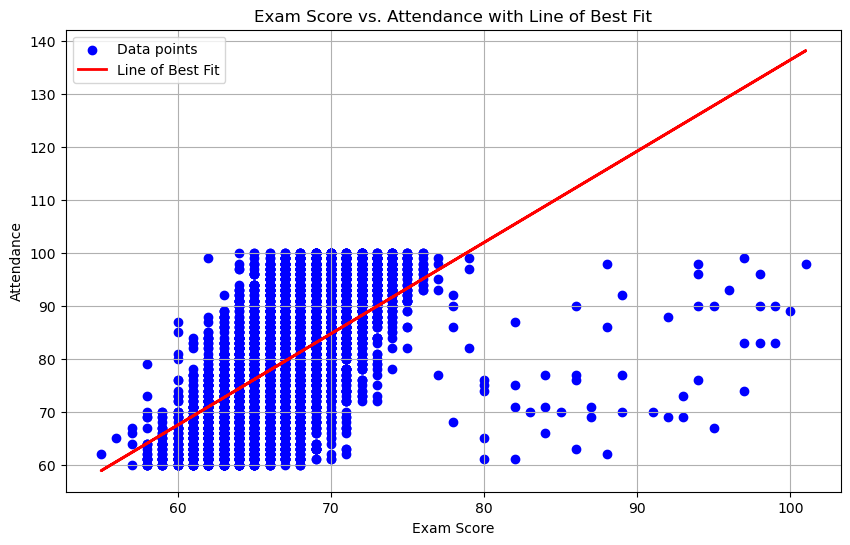

In [22]:
# Extract data for plotting
x = dataset['Exam_Score']
y = dataset['Attendance']

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line_of_best_fit = slope * x + intercept

# Plot the data and the line of best fit
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, line_of_best_fit, color='red', linestyle='-', linewidth=2, label='Line of Best Fit')
plt.title('Exam Score vs. Attendance with Line of Best Fit')
plt.xlabel('Exam Score')
plt.ylabel('Attendance')
plt.legend()
plt.grid(True)
plt.show()

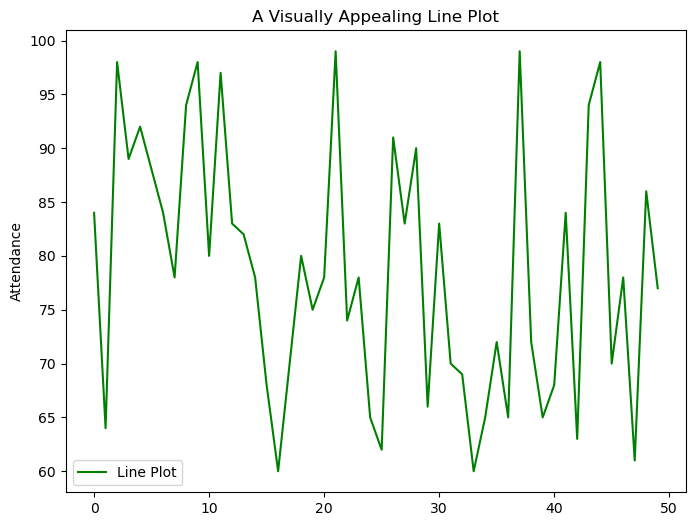

In [23]:
plt.figure(figsize=(8, 6))
sns.lineplot(dataset['Attendance'][:50], color='green', label='Line Plot')
plt.title('A Visually Appealing Line Plot')
plt.legend()


<Axes: >

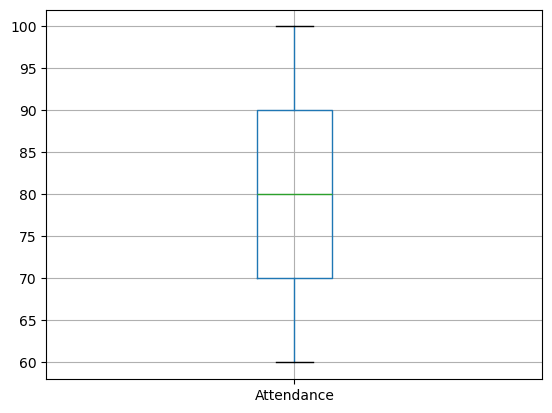

In [24]:
dataset.boxplot(column='Attendance')

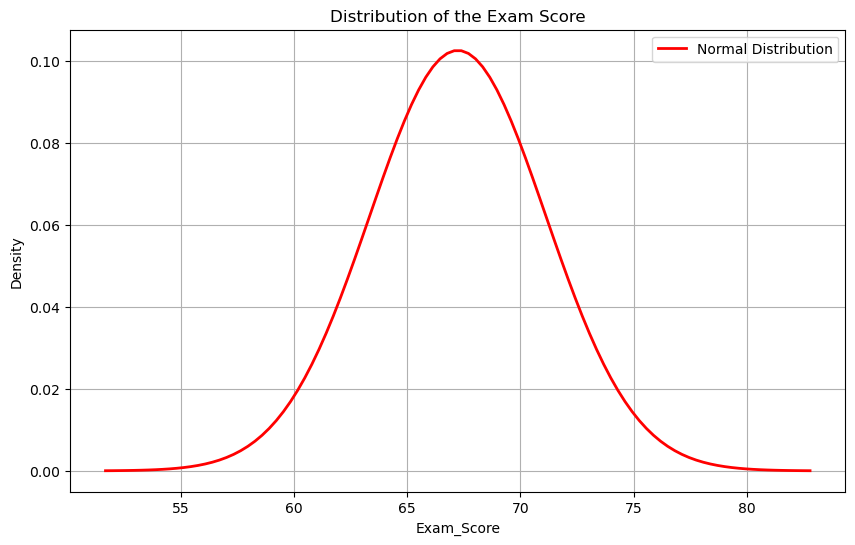

In [25]:
column_name = 'Exam_Score'

plt.figure(figsize=(10, 6))


mean = dataset['Exam_Score'].mean()
std_dev = dataset['Exam_Score'].std()
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 100)
p = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)
plt.plot(x, p, color='red', label='Normal Distribution', linewidth=2)


plt.title('Distribution of the ' + 'Exam Score')
plt.xlabel('Exam_Score')
plt.ylabel('Density')
plt.legend()
plt.grid()

plt.show()